# EDA 2

In [2]:
import pandas as pd
import numpy as np

Data = pd.read_csv("adult_with_headers.csv")

In [2]:
Data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
print(Data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [5]:
## itseems there are no null values in the adult data

In [6]:
Data.describe().round(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [7]:
num_cols = Data.select_dtypes(include=['int', 'float']).columns

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Stdscaler = StandardScaler()
MinMaxscaler = MinMaxScaler()

Stdscaler = Stdscaler.fit_transform(Data[num_cols])
MinMaxscaler = MinMaxscaler.fit_transform(Data[num_cols])

In [9]:
## standard scaling is used when data is normally distributed and used in logistic regression
## Min Max is used when data is not normally distributed.

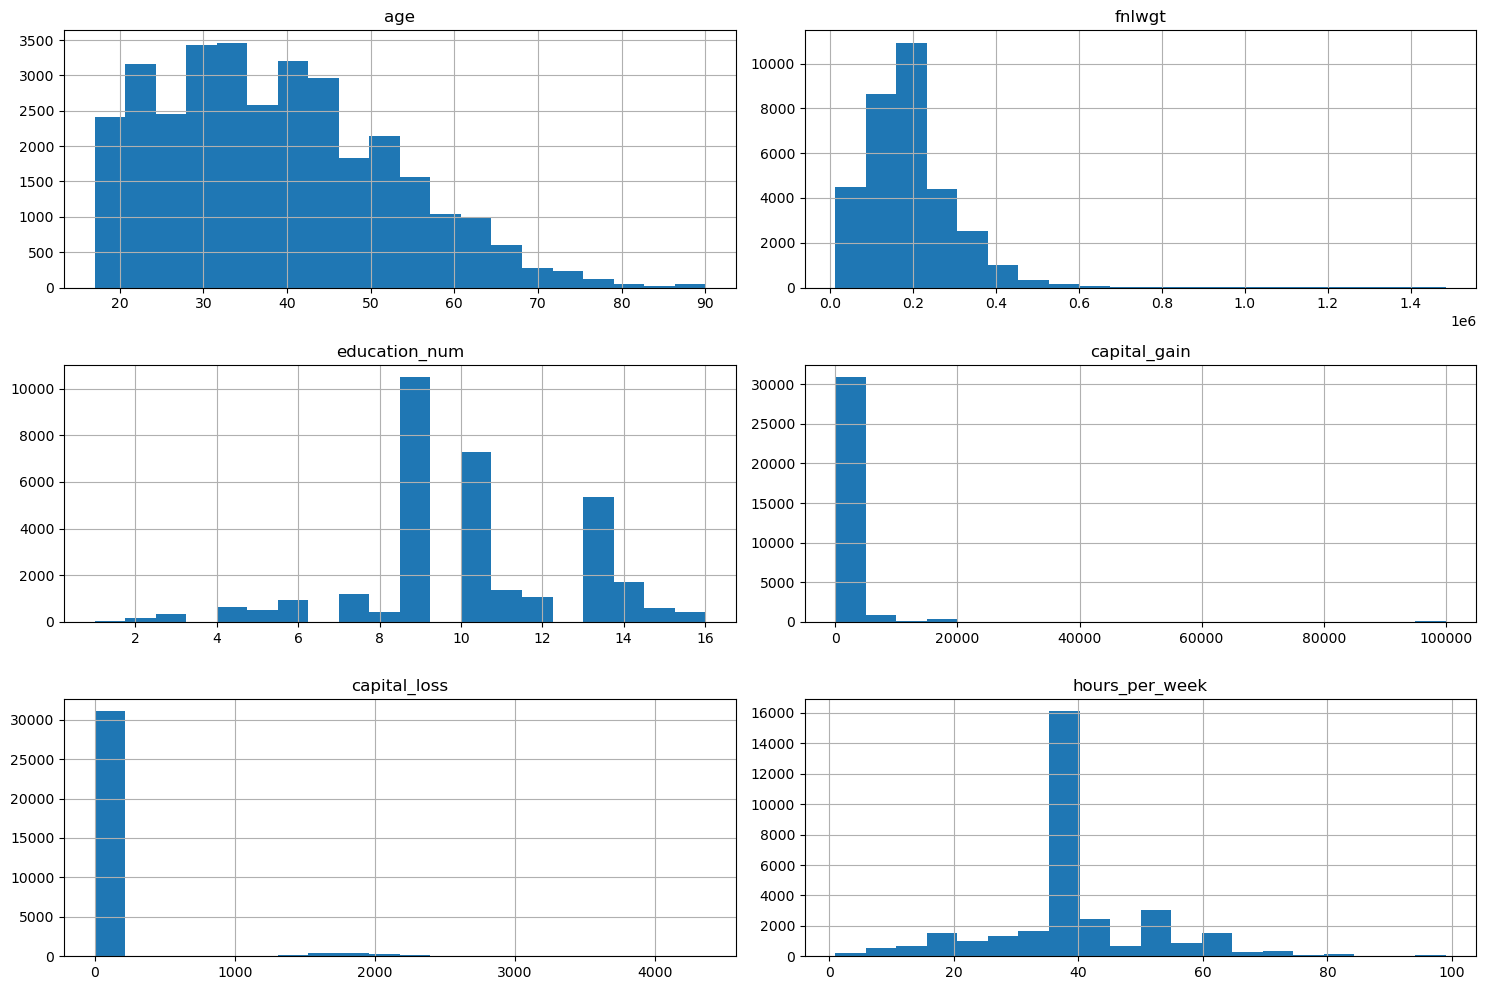

In [10]:
import matplotlib.pyplot as plt

Data[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [11]:
#all are skewed but hours per week is close to normal

In [12]:
cat_col = Data.select_dtypes(include='object').columns

In [13]:
Card_col_less_than_5 = [col for col in cat_col if Data[col].nunique() <= 5]
Card_col_more_than_5 = [col for col in cat_col if Data[col].nunique() > 5]

In [14]:
Card_col_less_than_5

['race', 'sex', 'income']

In [15]:
Card_col_more_than_5

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [16]:
original_columns = ['race', 'sex', 'income']  

In [17]:
print(Data[['race', 'sex', 'income']].head())

     race      sex  income
0   White     Male   <=50K
1   White     Male   <=50K
2   White     Male   <=50K
3   Black     Male   <=50K
4   Black   Female   <=50K


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# One-Hot Encoding for less than 5
Data = pd.get_dummies(Data, columns=Card_col_less_than_5, drop_first=True)
# Label Encoding for high-cardinality features
le = LabelEncoder()
for col in Card_col_more_than_5:
    Data[col] = le.fit_transform(Data[col])

In [19]:
print(Data.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Male', 'income_ >50K']


In [20]:
# Feature
Data['age_bins'] = pd.cut(Data['age'], bins=[0, 25, 45, 65, 90], labels=['Young', 'Adult', 'Senior', 'Elderly'])

# Working hours per age (indicator of productivity)
Data['working_hours_ratio'] = Data['hours_per_week'] / (Data['age'] + 1)
Data['age_bins']

0         Adult
1        Senior
2         Adult
3        Senior
4         Adult
          ...  
32556     Adult
32557     Adult
32558    Senior
32559     Young
32560    Senior
Name: age_bins, Length: 32561, dtype: category
Categories (4, object): ['Young' < 'Adult' < 'Senior' < 'Elderly']

In [21]:
# age is chosen as it is easier to understand the data and how age affects the working pattern 

In [22]:
Data['working_hours_ratio'].round(3)

0        1.000
1        0.255
2        1.026
3        0.741
4        1.379
         ...  
32556    1.357
32557    0.976
32558    0.678
32559    0.870
32560    0.755
Name: working_hours_ratio, Length: 32561, dtype: float64

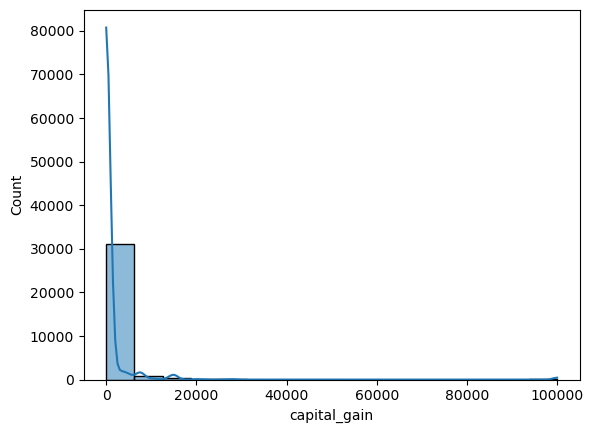

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(Data['capital_gain'], kde=True)
# Log transform
Data['log_capital_gain'] = np.log1p(Data['capital_gain'])

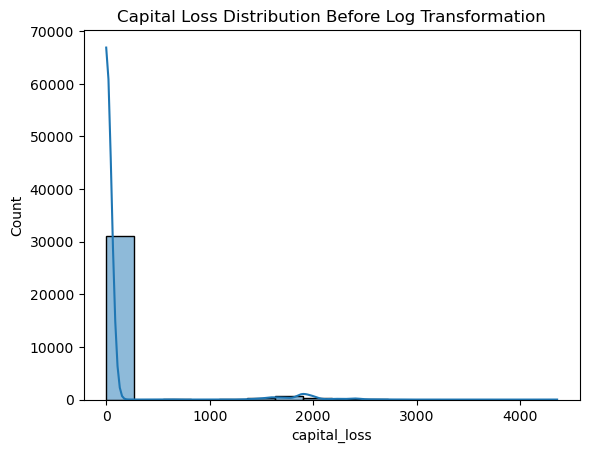

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(Data['capital_loss'], kde=True)
plt.title('Capital Loss Distribution Before Log Transformation')
plt.show()
# Log transform
Data['log_capital_loss'] = np.log1p(Data['capital_loss'])

In [25]:
# Capital-gain is usually right-skewed; log transformation normalizes distribution and helps model performance.

In [26]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(Data[num_cols])
# Remove outliers
Data = Data[outliers == 1]

In [27]:
# Outliers can distort model training, especially for models sensitive to scale (like regression, k-NN, SVM).

In [28]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


In [29]:
import ppscore as pps

pps_matrix = pps.matrix(Data)[['x', 'y', 'ppscore']]
pps_matrix.sort_values(by='ppscore', ascending=False).head(10)

,x,y,ppscore
0,age,age,1.0
230,hours_per_week,hours_per_week,1.0
69,education,education,1.0
70,education,education_num,1.0
91,education_num,education,1.0
92,education_num,education_num,1.0
115,marital_status,marital_status,1.0
138,occupation,occupation,1.0
161,relationship,relationship,1.0
184,capital_gain,capital_gain,1.0


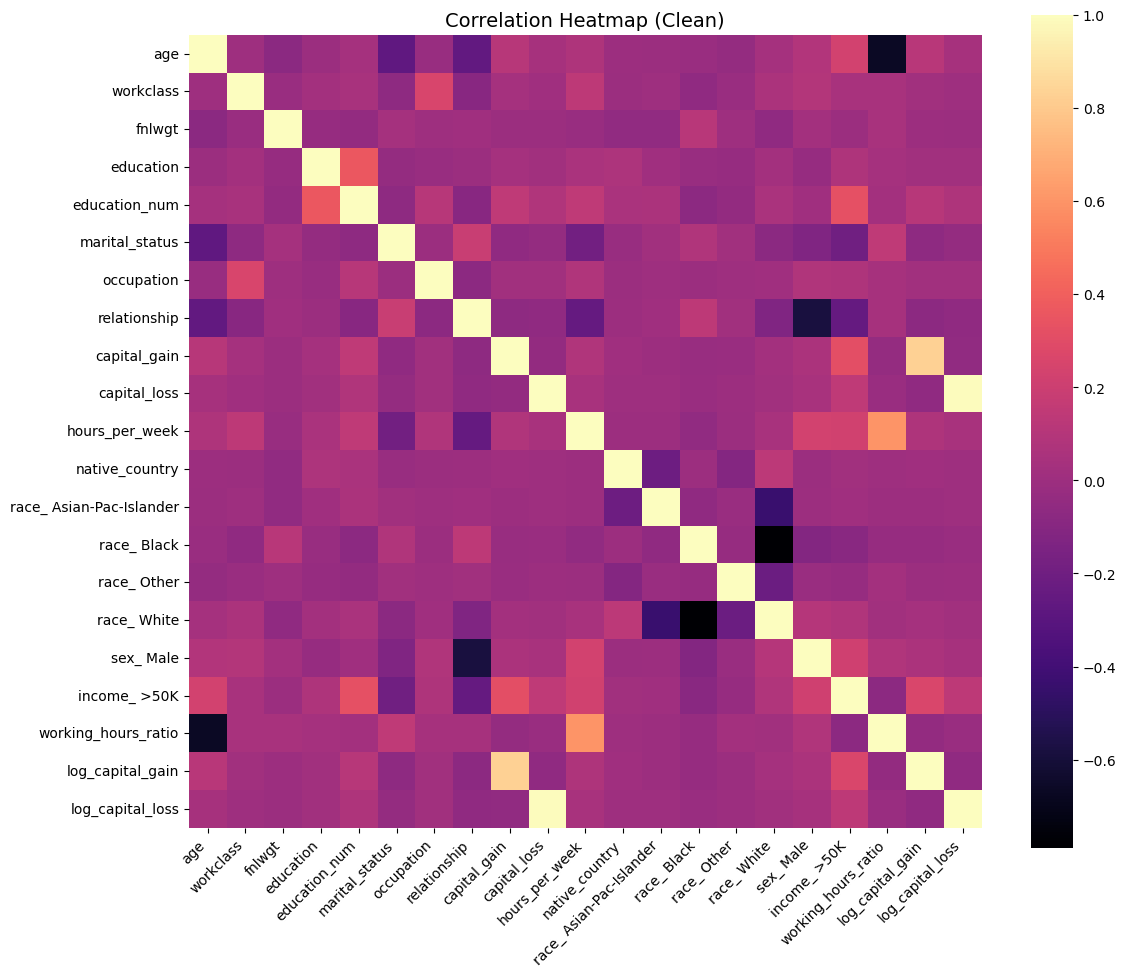

In [30]:
import seaborn as sns
corr = Data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='magma', cbar=True, square=True)

plt.title("Correlation Heatmap (Clean)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [31]:
# Correlation only captures linear relationships.
# PPS captures non-linear and predictive power, especially helpful with categorical features.